In [121]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pickle
import warnings

In [123]:
# Suppress warnings for better readability of outputs
warnings.filterwarnings('ignore')

In [125]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Telecommunications_churn/main/telecommunications_churn.csv")

In [127]:
# Display the first few rows of the dataset
print("Dataset Structure:")
df.head()

Dataset Structure:


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [129]:
# Check for missing values and data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3

In [131]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [133]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64


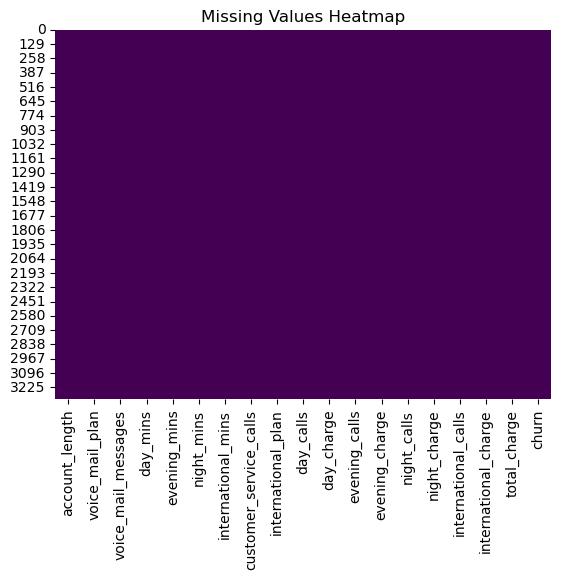

In [135]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

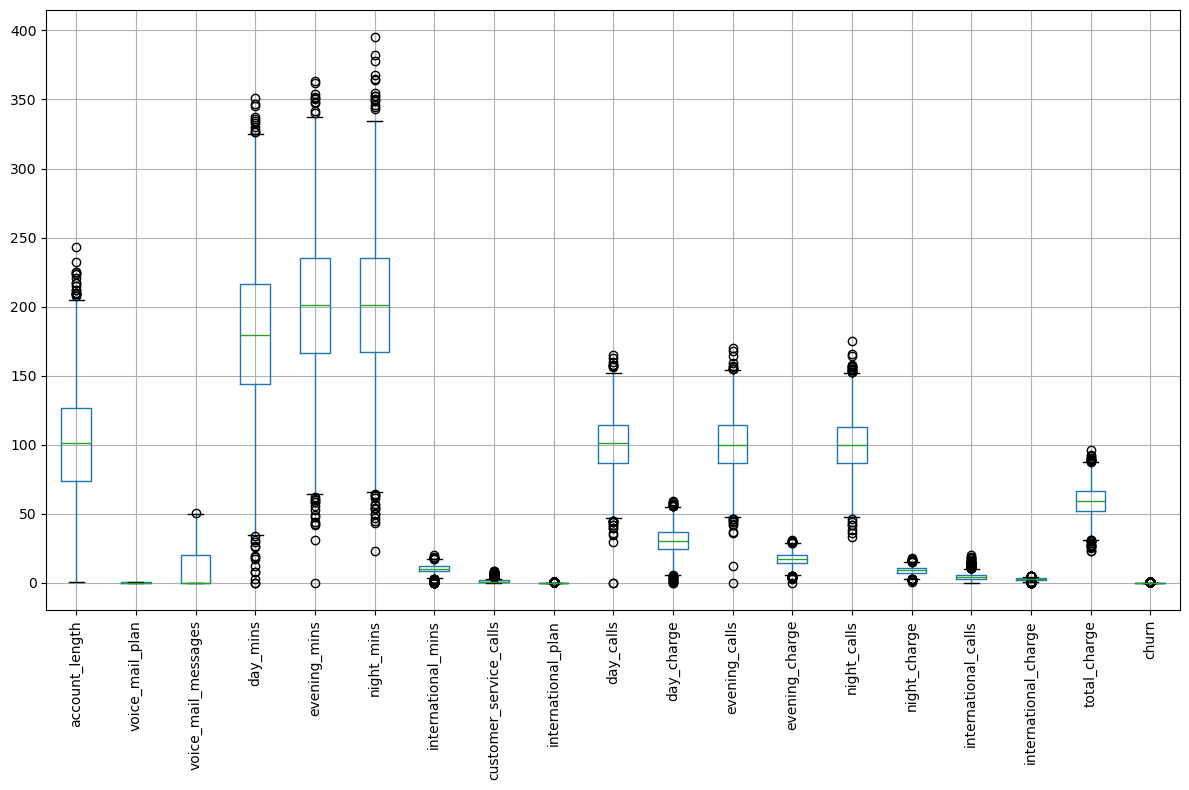

In [139]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

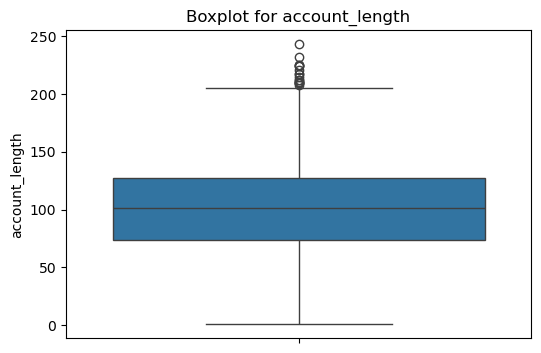

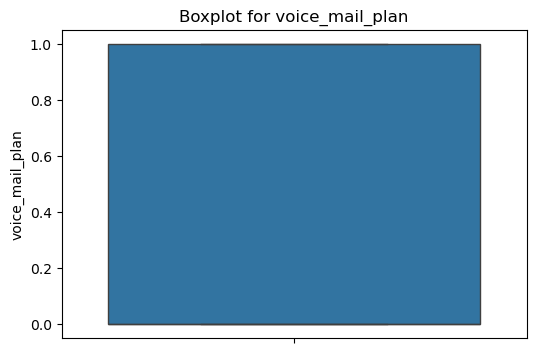

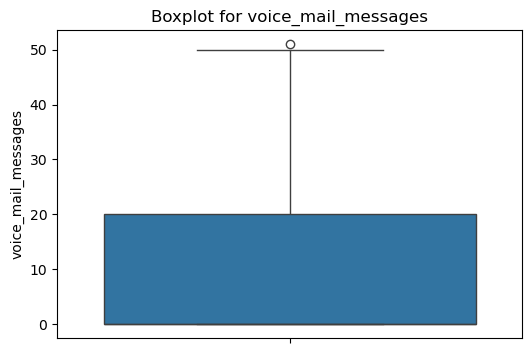

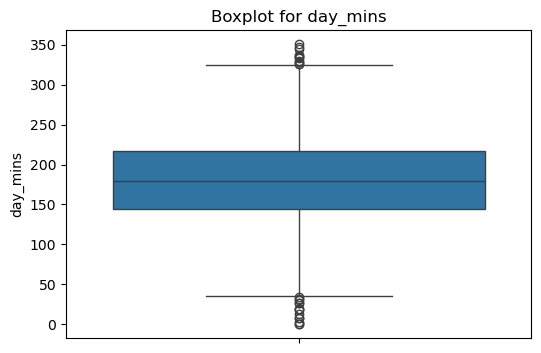

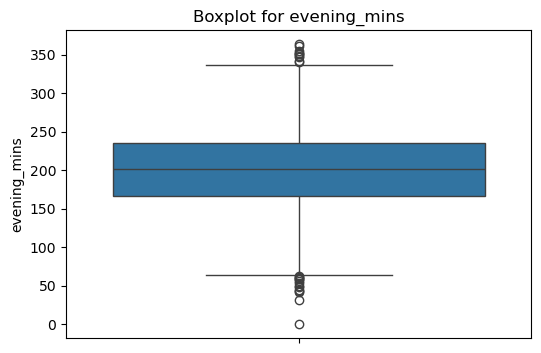

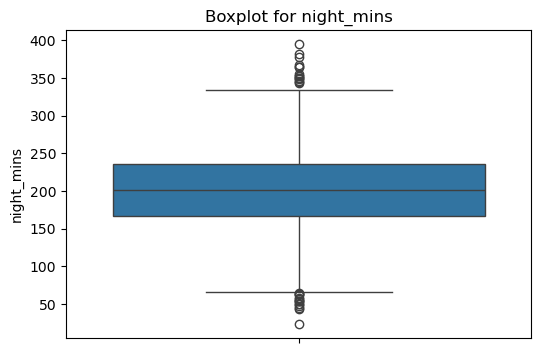

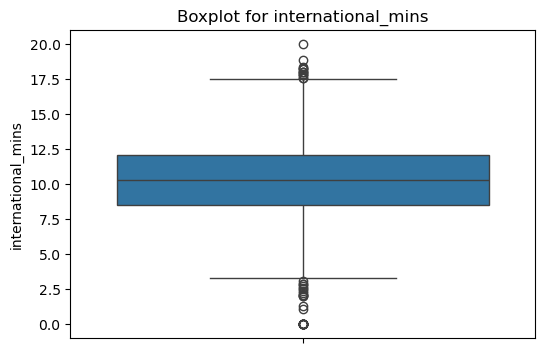

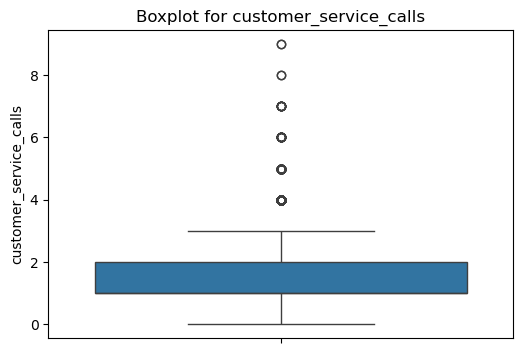

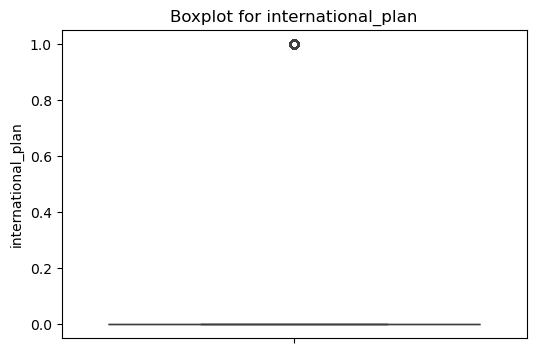

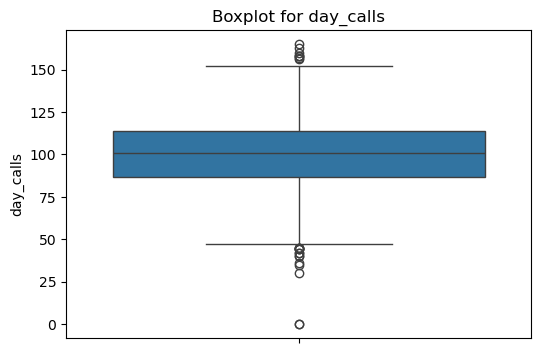

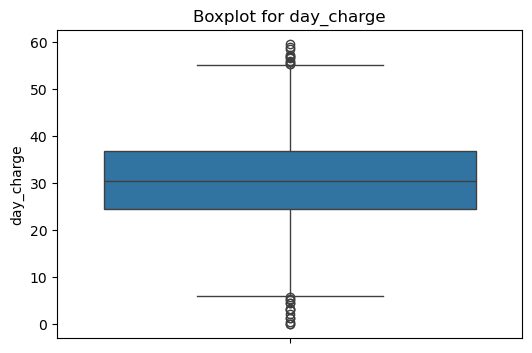

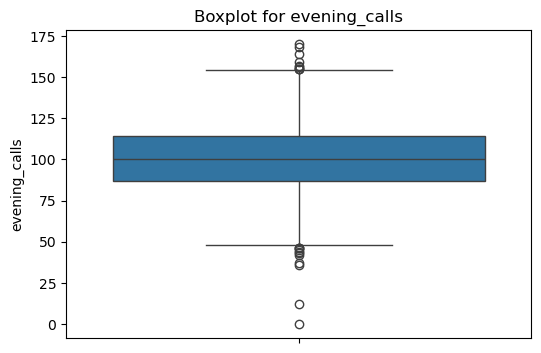

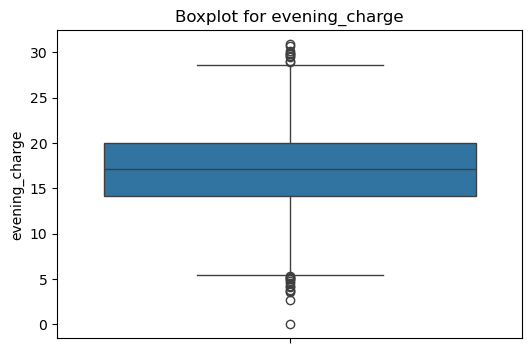

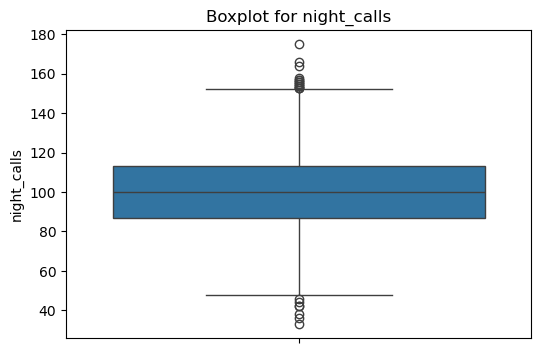

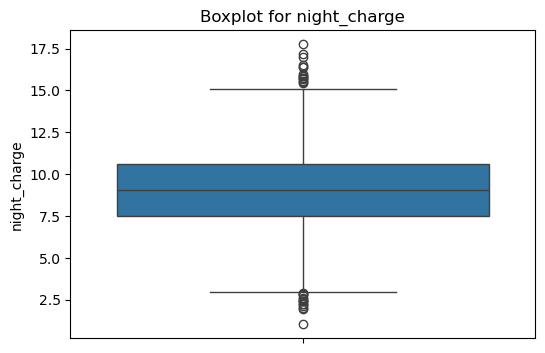

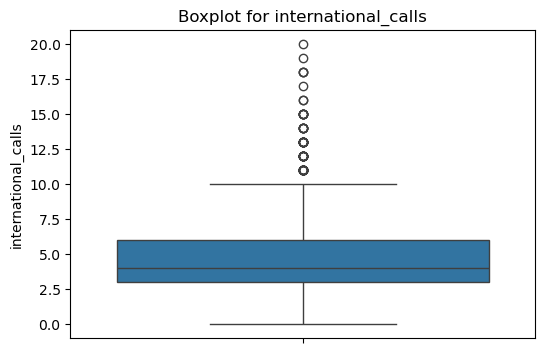

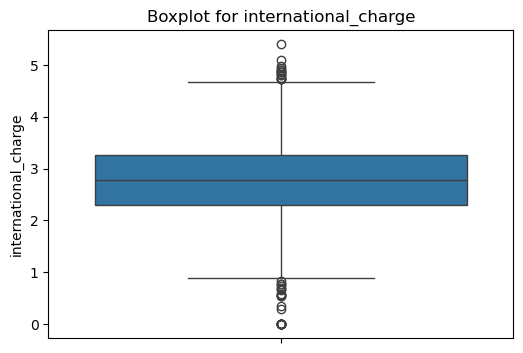

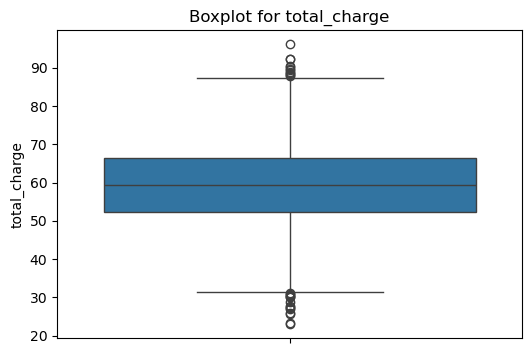

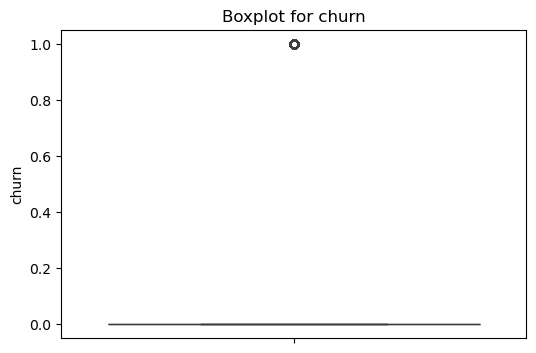

In [141]:
# Boxplot for each column separately
columns_to_treat = df.select_dtypes(include=['float64', 'int64']).columns
for column in columns_to_treat:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [143]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [145]:
# Identify numerical columns for outlier detection
num_columns = df.drop(columns=['churn']) 

# Function to detect and handle outliers
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Choose replacement method based on skewness
    if df[column].skew() > 1 or df[column].skew() < -1:
        replacement_value = df[column].median()
    else:
        replacement_value = df[column].mean()

    # Replace outliers
    df[column] = df[column].apply(lambda x: replacement_value if x < lower_bound or x > upper_bound else x)


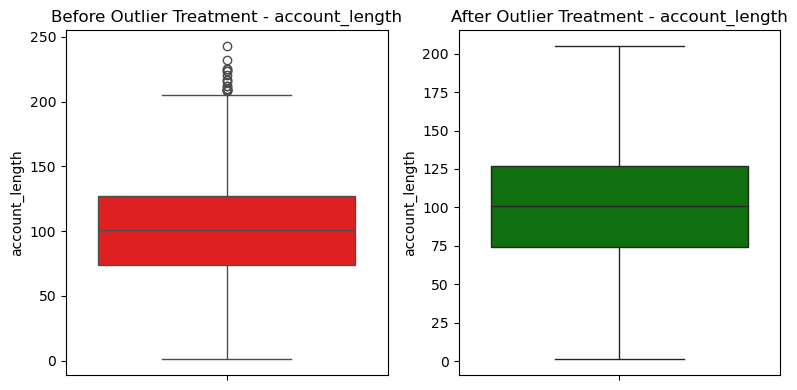

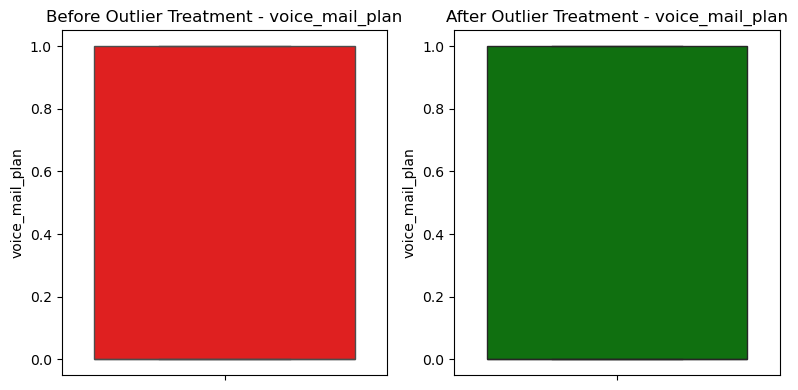

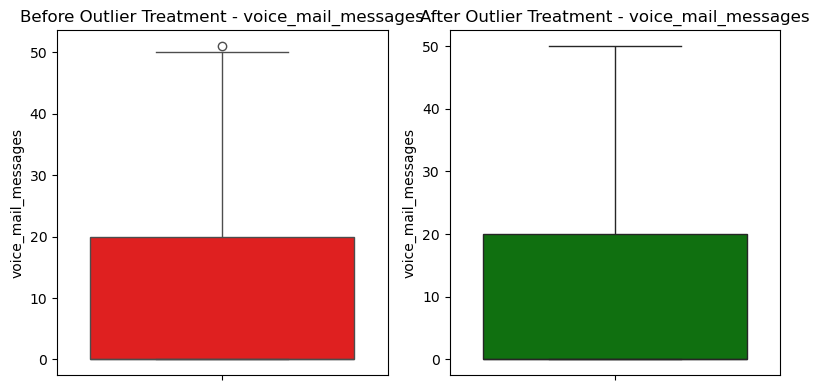

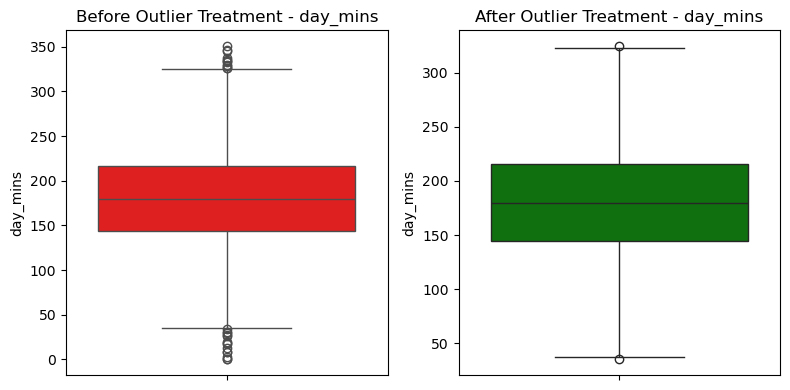

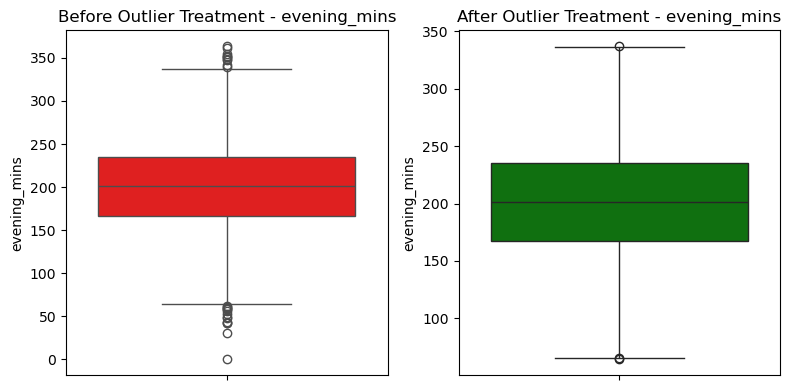

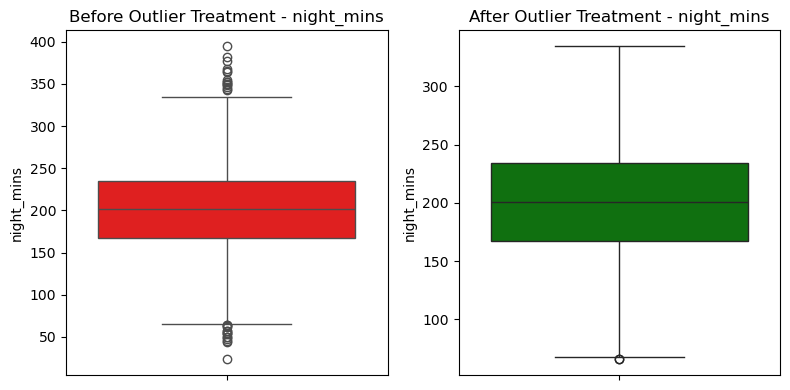

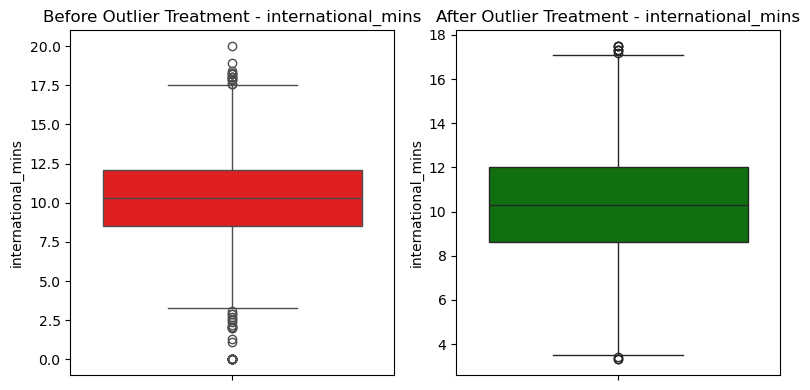

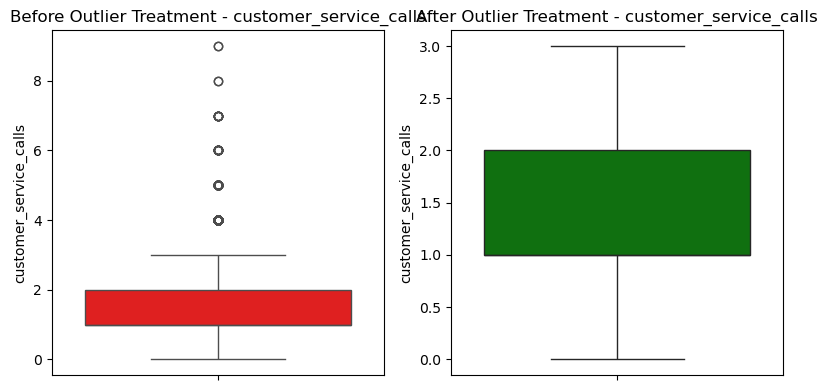

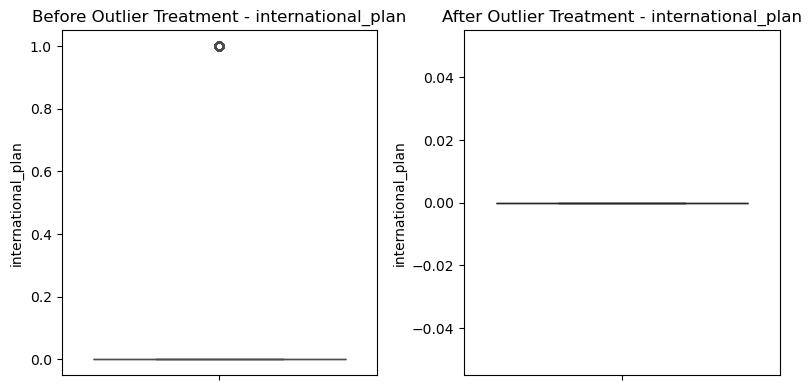

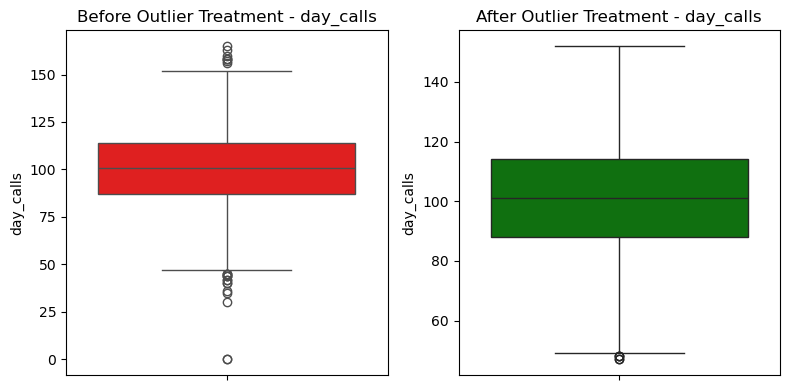

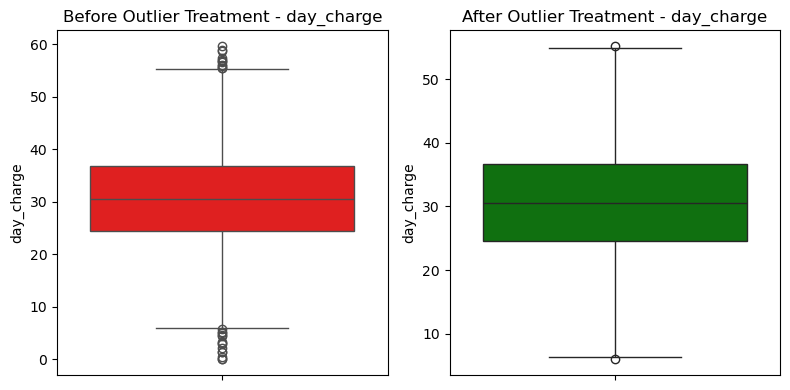

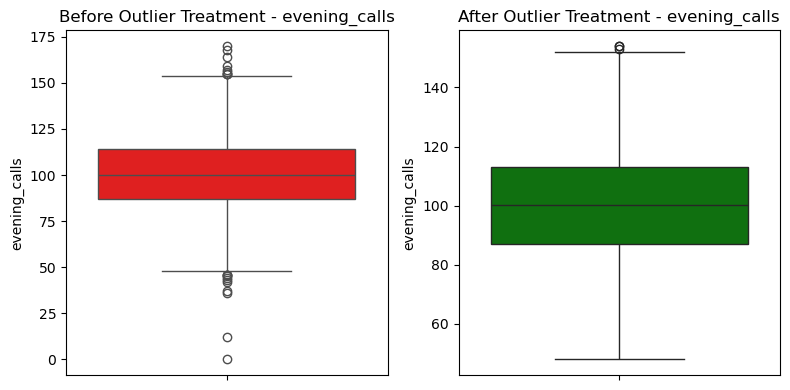

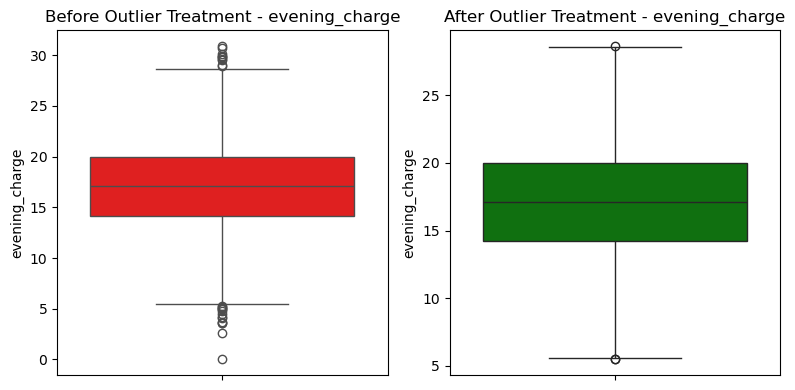

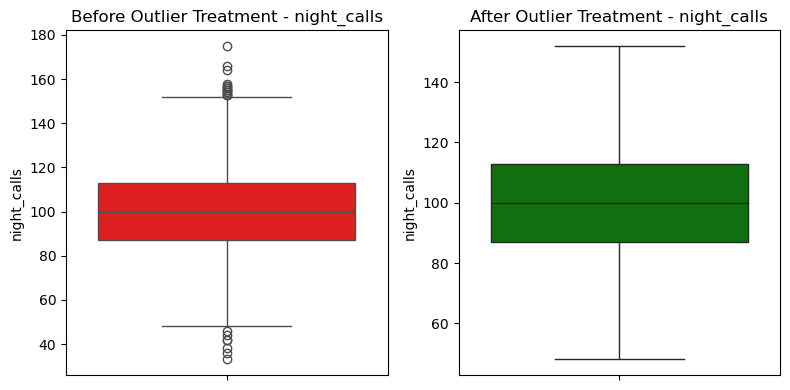

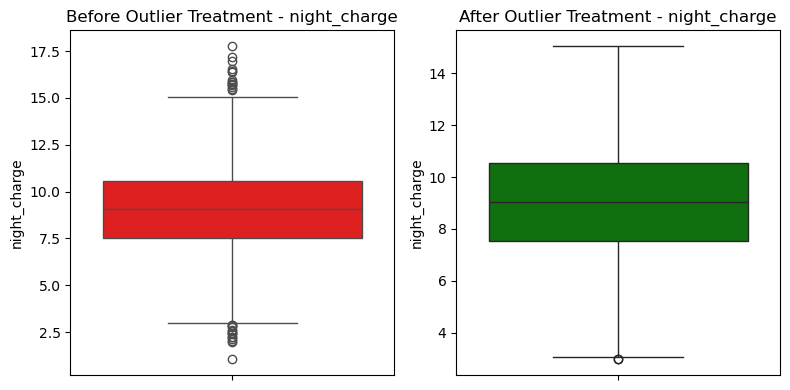

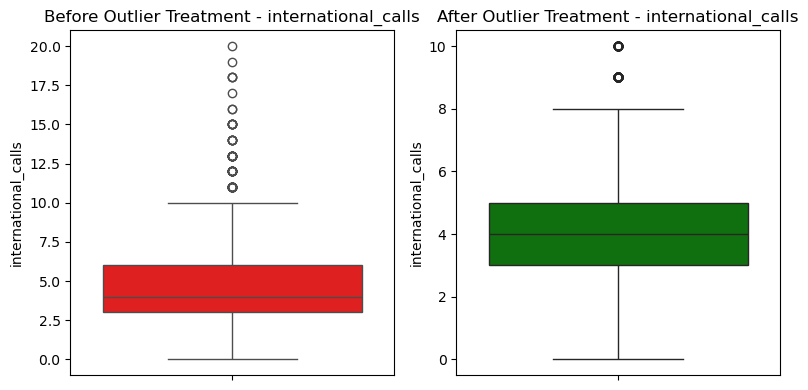

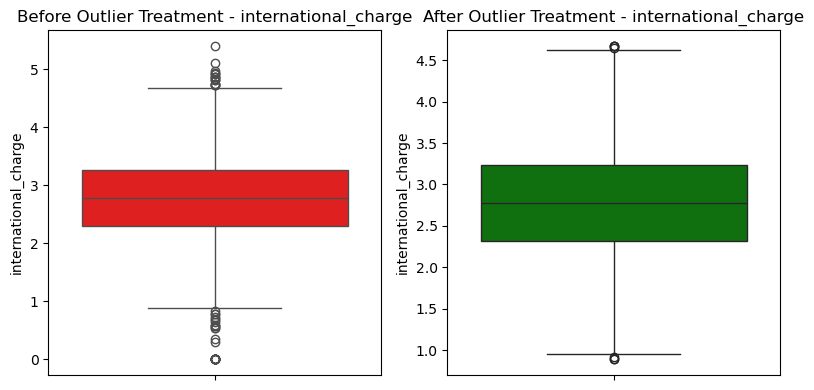

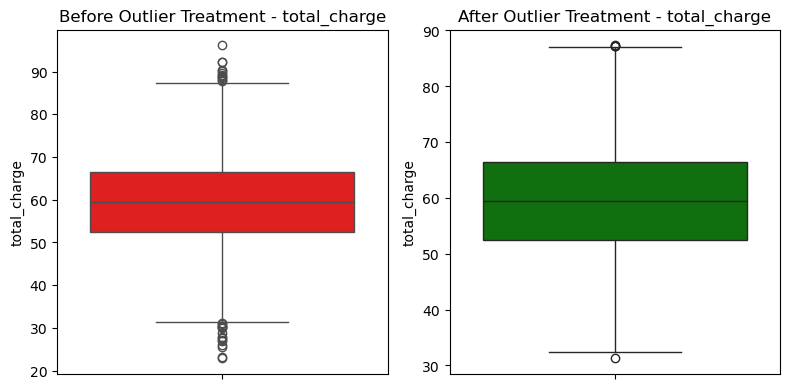

In [147]:
# Boxplots before and after outlier treatment
for column in num_columns:
    plt.figure(figsize=(8, 4))
    
    # Before treatment
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Before Outlier Treatment - {column}')
    
    # Apply outlier handling
    handle_outliers(df, column)

    # After treatment
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column], color='green')
    plt.title(f'After Outlier Treatment - {column}')
    
    plt.tight_layout()
    plt.show()


In [95]:
df.shape

(3333, 19)

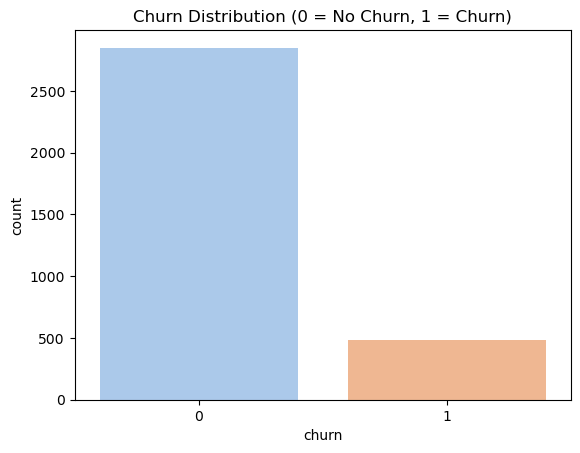

In [149]:
# Visualizing churn distribution (target variable)
sns.countplot(x='churn', data=df, palette='pastel')
plt.title('Churn Distribution (0 = No Churn, 1 = Churn)')
plt.show()

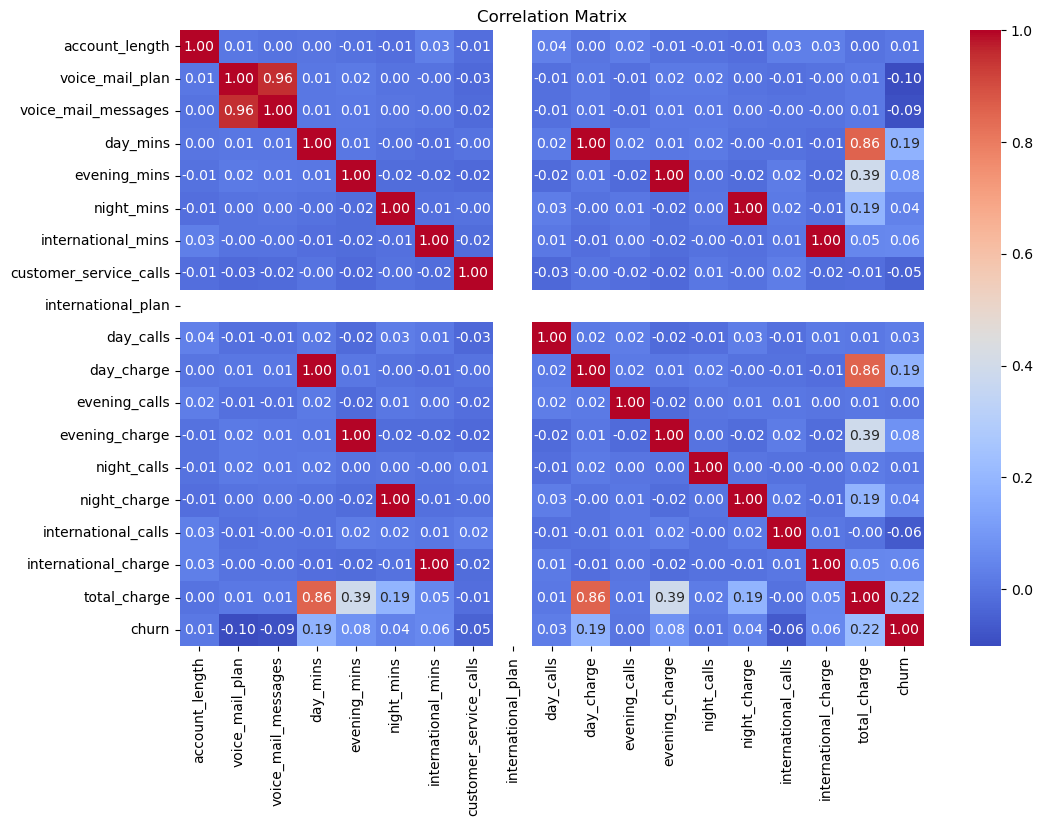

In [151]:
# Visualizing correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [153]:
# Separate features and target variable
x = df.drop(columns=['churn'])  # Features (all columns except 'churn')
y = df['churn']  # Target (churn column)

In [155]:
# Split the data into training and testing sets (80% training, 20% testing)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [157]:
# Standardize the features (only on training data)
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [159]:
# Function to evaluate models
def evaluate_model(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)  # Train the model
    ypred = model.predict(xtest)  # Make predictions

    # Calculate and print performance metrics
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    roc_auc = roc_auc_score(ytest, ypred)

    print(f"{model.__class__.__name__}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC Score: {roc_auc:.4f}")
    print("=" * 50)

    return accuracy, precision, recall, f1, roc_auc

In [161]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}


In [163]:
# Evaluate models and store performance
model_performance = {}

In [165]:
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    performance = evaluate_model(model, xtrain_scaled, ytrain, xtest_scaled, ytest)
    model_performance[model_name] = performance

Evaluating Logistic Regression...
LogisticRegression:
  Accuracy: 0.8486
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  ROC AUC Score: 0.5000
Evaluating Random Forest...
RandomForestClassifier:
  Accuracy: 0.9175
  Precision: 0.9600
  Recall: 0.4752
  F1 Score: 0.6358
  ROC AUC Score: 0.7359
Evaluating Gradient Boosting...
GradientBoostingClassifier:
  Accuracy: 0.9175
  Precision: 0.9600
  Recall: 0.4752
  F1 Score: 0.6358
  ROC AUC Score: 0.7359
Evaluating AdaBoost...
AdaBoostClassifier:
  Accuracy: 0.8981
  Precision: 0.7705
  Recall: 0.4653
  F1 Score: 0.5802
  ROC AUC Score: 0.7203
Evaluating SVM...
SVC:
  Accuracy: 0.8981
  Precision: 0.9714
  Recall: 0.3366
  F1 Score: 0.5000
  ROC AUC Score: 0.6674
Evaluating KNN...
KNeighborsClassifier:
  Accuracy: 0.8876
  Precision: 0.8421
  Recall: 0.3168
  F1 Score: 0.4604
  ROC AUC Score: 0.6531
Evaluating XGBoost...
XGBClassifier:
  Accuracy: 0.9100
  Precision: 0.8727
  Recall: 0.4752
  F1 Score: 0.6154
  ROC AUC Score: 0.731

In [167]:
# Identify the best model based on the highest F1 score (or ROC AUC)
best_model_name = max(model_performance, key=lambda name: model_performance[name][3])
best_model_performance = model_performance[best_model_name]

In [169]:
# Display the best model's performance
print(f"Best model based on F1 score: {best_model_name}")
print(f"Performance:\n Accuracy: {best_model_performance[0]:.4f}, "
      f"\n Precision: {best_model_performance[1]:.4f}, "
      f"\n Recall: {best_model_performance[2]:.4f}, "
      f"\n F1 Score: {best_model_performance[3]:.4f}, "
      f"\n ROC AUC: {best_model_performance[4]:.4f}")

Best model based on F1 score: Random Forest
Performance:
 Accuracy: 0.9175, 
 Precision: 0.9600, 
 Recall: 0.4752, 
 F1 Score: 0.6358, 
 ROC AUC: 0.7359


In [171]:
# Hyperparameter tuning using GridSearchCV for the Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [173]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [175]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf node
    'bootstrap': [True, False]  # Bootstrap sampling
}

In [177]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

In [179]:
# Fit GridSearchCV
grid_search.fit(xtrain_scaled, ytrain)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [181]:
# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

In [183]:
# Display best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [185]:
# Predict on the test set using the best model
y_pred = best_rf_model.predict(xtest_scaled)

In [187]:
# Re-evaluate the tuned model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [189]:
# Make predictions
ypred_tuned = best_rf_model.predict(xtest_scaled)

In [191]:
# Calculate F1 score using classification_report
f1 = classification_report(ytest, ypred_tuned, output_dict=True)['weighted avg']['f1-score']

In [193]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(ytest, best_rf_model.predict_proba(xtest_scaled)[:, 1])

In [195]:
# Re-evaluate the tuned model's performance
print(f"Final performance of the best model (after tuning):")
print(f"  Accuracy: {accuracy_score(ytest, ypred_tuned):.4f}")
print(f"  Precision: {precision_score(ytest, ypred_tuned):.4f}")
print(f"  Recall: {recall_score(ytest, ypred_tuned):.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC Score: {roc_auc:.4f}")


Final performance of the best model (after tuning):
  Accuracy: 0.9205
  Precision: 1.0000
  Recall: 0.4752
  F1 Score: 0.9082
  ROC AUC Score: 0.8474


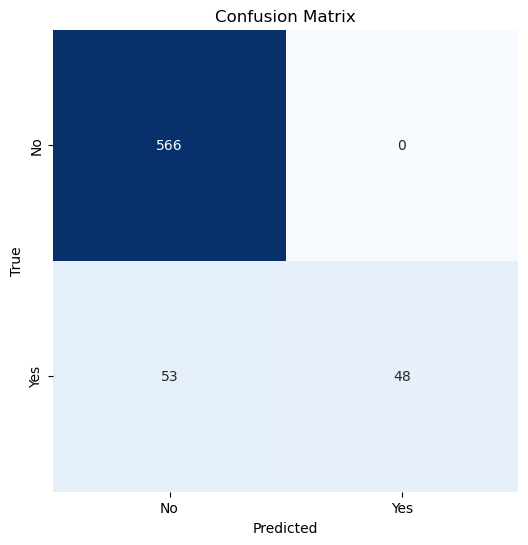

In [197]:
# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [199]:
# Save the tuned model to a pickle file for later use
pickle.dump(best_rf_model, open('best_model.pkl', 'wb'))

print("Model has been saved as 'best_model.pkl'.")

Model has been saved as 'best_model.pkl'.
